# Gradient Descent

## Calculus Review


This is a somewhat self-evident truth; for the sake of completeness, I will be thorough.

Very often, a primary (if not the only) goal of machine learning involves optimization of some sort. In nearly all cases, this means finding the derivative of a certian function and seeking the minimum or the maximum value. In terms of slope, extremes can be found when that derivative (slope of the tangent line) is 0. This is something learned in an early Calculus class, but the implications are far reaching and critical to minimizing loss for many machine learning algorithms. Let's examine an example we might find in that early Calculus class first describing the concept of derivatives and expound further as it relates to machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Take the following function as our current working example:
$$ f(x) = x^2 - 4x +5 $$

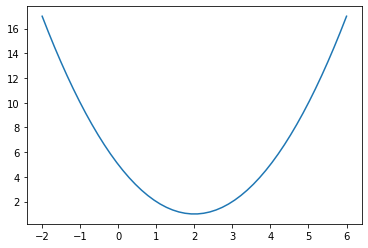

In [34]:
x = np.linspace(-2,6)
def f(w):
    return w**2 - 4*w + 5

plt.plot(x,f(x))




The first thing that is obvious is this is a function in the domain of $\mathbb{R}^2$, thus visualizable. Next, it is an easily differentiable function; in many ways its a friendly function.  
As seen in the graph, this function is a typical hyerbolic function which is convex, i.e. $f''(x) > 0$, with a very clear minimum, graphically.  
In order to find the extrema numerically, take the derivative and set it equal to zero:

$$
f'(x) = 2x - 4 \\
0 = 2x - 4 \\
2x - 4 = 0 \\
2x = 4 \\
f'(x) = 0 \ ; \ x = 2
$$
In order to know that whether the extrema is a minimum or a maximum, take the second derivative of the function:  

if $f''(x) > 0$, it is a local minimum;  
if $f''(x) < 0, it is a local maximum;  
if $f''(x) = 0$, it is inconclusive.

$$
f''(x) = 2
$$

As expected, $2 > 0$ so the extrema is a (global, in this case) minumum.  
Solving the equation $f'(x) = 0$ is possible in this case because of the "friendliness" of the function. Now, consider the function is NOT friendly and solving $f'(x) = 0$ is very complicated or impossible; this is where the aforementioned technique of **gradient descent**  will be utilized.

# Gradient Descent

Essentially, the gradient of a differentiable function $f$ of several variables ($x_0, x_1, \cdots, x_n$) is the rate of fastest increase. It is a vector comprised of partial derivatives with respect to each variable in the function. Gradient descent evaluates the gradient at an arbitrary point $p$, scales it by the hyperparameter $\alpha$, and updates the next guess such that $p_{n+1} = p_n - \alpha \cdot \nabla f$. In a singular variate function like above, the "gradient" is simply the derivative of the function, but the process remains the same.

Below, we will reuse the function above, *while utilizing gradient descent*. Taking the arbitrary value of $x_0=5$, we evaluate the gradient (derivative in this case; function is singularly variate) at that point to be $f'(5) = 6$.  We can assign the hyperparameter $\alpha$ (the learning rate) to be 0.8:

$$
x_1 = x_0 - \alpha \cdot f'(x_0) \\
x_1 = 5 - 0.8 \cdot 6 \\
x_1 = 5 - 4.8 \\
x_1 = 0.2
$$

Now, there is an updated point to repeat the process until the gradient is (nearly) 0.

x0 = 5.0


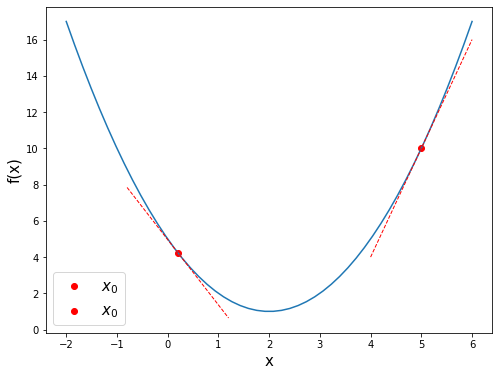

In [51]:
# Define the derivative 
def df(w): 
    return 2*w - 4

# Choose the random guess
w_0 = 5.0
w_1 = 0.2

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "red", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)
    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1, 
            color = "red")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"$x_{i}$")


plt.figure(figsize = (8, 6))

plt.plot(x, f(x))

tangent_line(w_0, f, df)
tangent_line(w_1, f, df)

print("x0 =" , w_0)

plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.legend(fontsize = 15);

Picking an appropiate value for $\alpha$ is critical to the efficiancy, if not possibility,s of convergence to the minimum.

x_0 = 5.0                     f'(x_0) = 6.0
x_1 = 0.1999999999999993      f'(x_1) = -3.6000000000000014
x_2 = 3.0800000000000005      f'(x_2) = 2.160000000000001
x_3 = 1.3519999999999996      f'(x_3) = -1.2960000000000007
x_4 = 2.3888000000000003      f'(x_4) = 0.7776000000000005
x_5 = 1.7667199999999998      f'(x_5) = -0.4665600000000003
x_6 = 2.139968                f'(x_6) = 0.2799360000000002
x_7 = 1.9160192               f'(x_7) = -0.16796159999999993
x_8 = 2.05038848              f'(x_8) = 0.10077696000000014
x_9 = 1.9697669119999999      f'(x_9) = -0.06046617600000026
x_10 = 2.0181398528           f'(x_10) = 0.036279705600000156
x_11 = 1.9891160883199999     f'(x_11) = -0.02176782336000027
x_12 = 2.0065303470080003     f'(x_12) = 0.013060694016000518
x_13 = 1.9960817917951998     f'(x_13) = -0.00783641640960031
x_14 = 2.00235092492288       f'(x_14) = 0.004701849845759831
x_15 = 1.998589445046272      f'(x_15) = -0.0028211099074559876
x_16 = 2.0008463329722366     f'(x_16) = 0.0

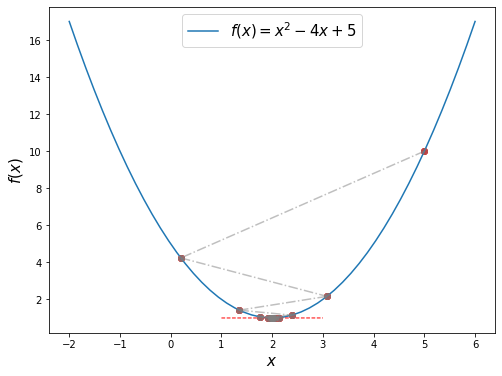

In [65]:
# Compute until you reach 1000 iterations or the derivative is less than 0.001

def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)
    return W

W = derivative_descent(df)



for i, w in enumerate(W):
    x_str = f"x_{i} = {w}".ljust(30)
    df_str = f"f'(x_{i}) = {df(w)}"
    print(x_str + df_str)
print("")

plt.figure(figsize = (8, 6))
plt.plot(x, f(x), label = "$f(x) = x^2 - 4x + 5$")
plt.scatter(W, f(W), color = "red")
plt.xlabel("$x$", fontsize = 15)
plt.ylabel("$f(x)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
tangent_line(W[18], f, df, i = 18, color = "black");

Y_result = [f(x) for x in W]
# Plotting
plt.scatter(W, Y_result, color='red', label='Points')
for i in range(len(W) - 1):
    plt.plot([W[i], W[i + 1]], [Y_result[i], Y_result[i + 1]], color='grey', linestyle='-.', marker='o', alpha = 0.5)
